# Linear regression

home price = m * (area) + b

In [19]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('./datasets/homeprices.csv')
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


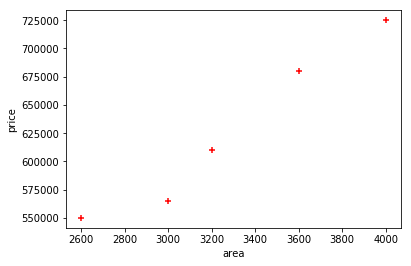

In [21]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

In [22]:
area = df[['area']]
area

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [23]:
a2 = np.c_[area,area**2]
a2

array([[    2600,  6760000],
       [    3000,  9000000],
       [    3200, 10240000],
       [    3600, 12960000],
       [    4000, 16000000]])

In [24]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [25]:
area.shape

(5, 1)

In [26]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(area,price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
reg.predict([[3000]])

array([587979.45205479])

In [29]:
reg.coef_

array([135.78767123])

In [30]:
reg.intercept_

180616.43835616432

**Y = m * X + b (m is coefficient and b is intercept)**

In [31]:
5000*135.78767123 + 180616.43835616432

859554.7945061643

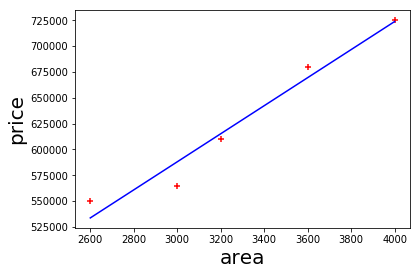

In [33]:
%matplotlib inline
plt.xlabel('area', fontsize=20)
plt.ylabel('price', fontsize=20)
plt.scatter(df.area,df.price,color='red',marker='+')
plt.plot(df.area,reg.predict(area),color='blue')

In [92]:
X = np.linspace(0.1,2,10)
y = np.exp(X)/np.sqrt(X)+0.7*np.sin(3*X)
y_obs = y+np.random.normal(0,0.2,y.shape)

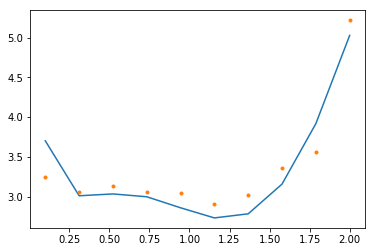

In [93]:
plt.plot(X,y)
plt.plot(X,y_obs,'.')

In [94]:
print(X.shape)
X = X[:,None]
print(X.shape)

(10,)
(10, 1)


In [95]:
reg1 = linear_model.LinearRegression()
reg1.fit(X,y_obs);
y1 = reg1.predict(X)

In [96]:
from sklearn.preprocessing import PolynomialFeatures
clrs = ['g','r','b','yellow','pink']

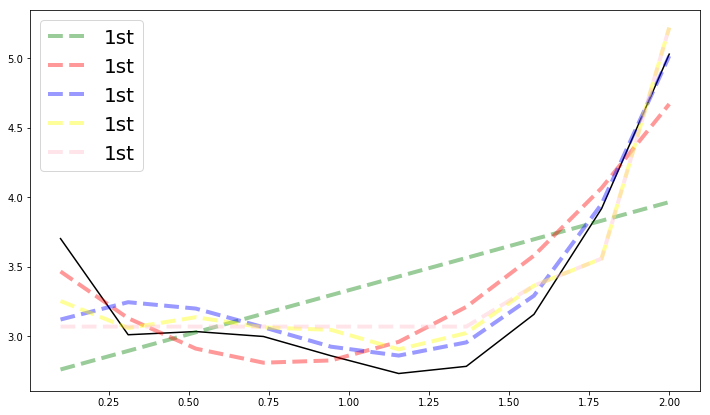

In [97]:
fig,ax = plt.subplots(1,1,figsize=(12,7))
ax.plot(X,y,'k')

for i,deg in enumerate([1,2,3,10,100]):
    pol = PolynomialFeatures(degree=deg)
    Xn = pol.fit_transform(X)
    reg = linear_model.LinearRegression()
    reg.fit(Xn,y_obs);
    ypred = reg.predict(Xn)
    ax.plot(X,ypred,color=clrs[i],ls='--',lw=4,label='1st',alpha=0.4)
    
plt.legend(fontsize=20)

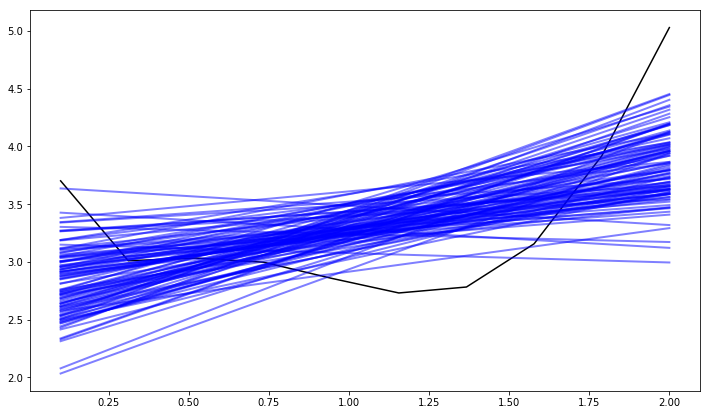

In [98]:
fig,ax = plt.subplots(1,1,figsize=(12,7))
ax.plot(X,y,'k')

deg = 1

for i in range(100):
    y_obs = y+np.random.normal(0,0.5,y.shape)
    pol = PolynomialFeatures(degree=deg)
    Xn = pol.fit_transform(X)
    reg = linear_model.LinearRegression()
    reg.fit(Xn,y_obs);
    ypred = reg.predict(Xn)
    ax.plot(X,ypred,ls='-',lw=2,alpha=0.5,color='b')

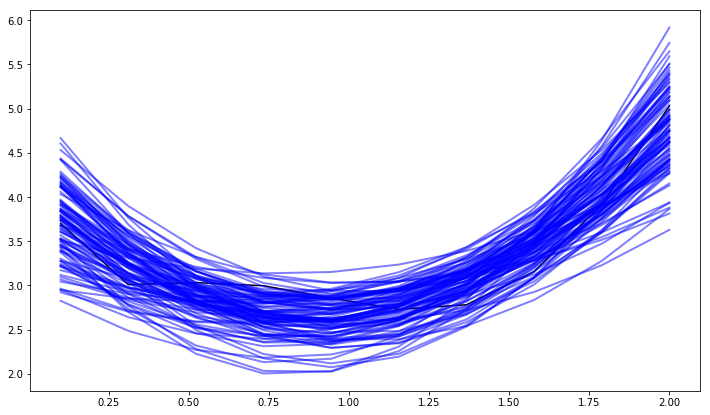

In [99]:
fig,ax = plt.subplots(1,1,figsize=(12,7))
ax.plot(X,y,'k')

deg = 2

for i in range(100):
    y_obs = y+np.random.normal(0,0.5,y.shape)
    pol = PolynomialFeatures(degree=deg)
    Xn = pol.fit_transform(X)
    reg = linear_model.LinearRegression()
    reg.fit(Xn,y_obs);
    ypred = reg.predict(Xn)
    ax.plot(X,ypred,ls='-',lw=2,alpha=0.5,color='b')

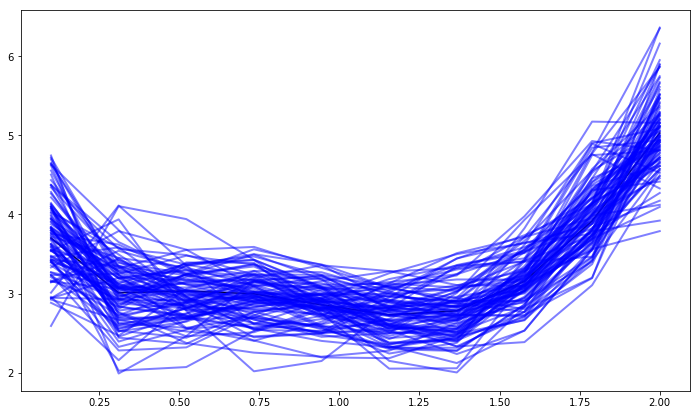

In [104]:
fig,ax = plt.subplots(1,1,figsize=(12,7))
ax.plot(X,y,'k')

deg = 5

for i in range(100):
    y_obs = y+np.random.normal(0,0.5,y.shape)
    pol = PolynomialFeatures(degree=deg)
    Xn = pol.fit_transform(X)
    reg = linear_model.LinearRegression()
    reg.fit(Xn,y_obs);
    ypred = reg.predict(Xn)
    ax.plot(X,ypred,ls='-',lw=2,alpha=0.5,color='b')

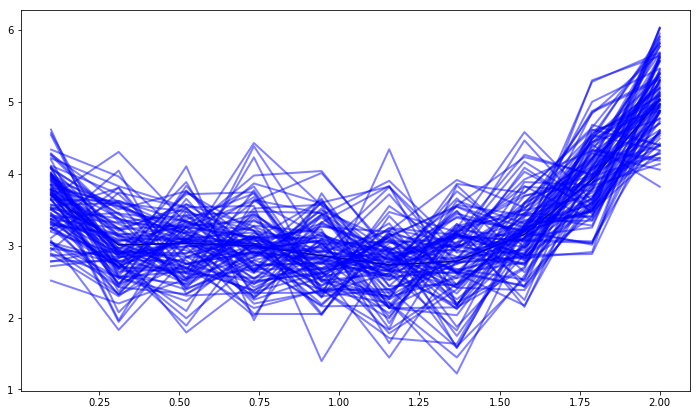

In [100]:
fig,ax = plt.subplots(1,1,figsize=(12,7))
ax.plot(X,y,'k')

deg = 10

for i in range(100):
    y_obs = y+np.random.normal(0,0.5,y.shape)
    pol = PolynomialFeatures(degree=deg)
    Xn = pol.fit_transform(X)
    reg = linear_model.LinearRegression()
    reg.fit(Xn,y_obs);
    ypred = reg.predict(Xn)
    ax.plot(X,ypred,ls='-',lw=2,alpha=0.5,color='b')

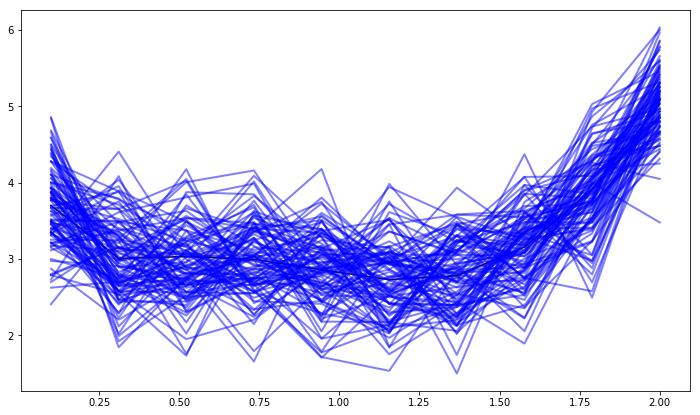

In [101]:
fig,ax = plt.subplots(1,1,figsize=(12,7))
ax.plot(X,y,'k')

deg = 40

for i in range(100):
    y_obs = y+np.random.normal(0,0.5,y.shape)
    pol = PolynomialFeatures(degree=deg)
    Xn = pol.fit_transform(X)
    reg = linear_model.LinearRegression()
    reg.fit(Xn,y_obs);
    ypred = reg.predict(Xn)
    ax.plot(X,ypred,ls='-',lw=2,alpha=0.5,color='b')

In [102]:
# fig,ax = plt.subplots(1,1,figsize=(12,7))
coefs = []
for deg in np.arange(1,25):
    pol = PolynomialFeatures(degree=deg)
    Xn = pol.fit_transform(X)
    reg = linear_model.LinearRegression()
    reg.fit(Xn,y_obs);
    coefs.append(np.sum(reg.coef_)**2)

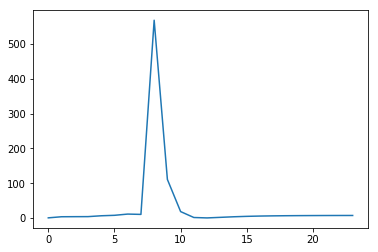

In [103]:
plt.plot(coefs)

# Ridge

In [111]:
coefs = []
for deg in np.arange(1,10):
    pol = PolynomialFeatures(degree=deg)
    Xn = pol.fit_transform(X)
    reg = linear_model.Ridge()
    reg.fit(Xn,y_obs);
    coefs.append(np.sum(reg.coef_)**2)

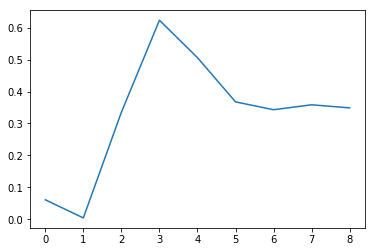

In [112]:
plt.plot(coefs)

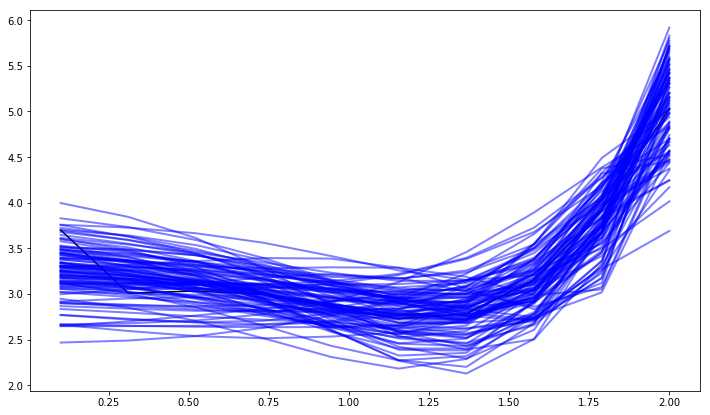

In [113]:
fig,ax = plt.subplots(1,1,figsize=(12,7))
ax.plot(X,y,'k')

deg = 8

for i in range(100):
    y_obs = y+np.random.normal(0,0.5,y.shape)
    pol = PolynomialFeatures(degree=deg)
    Xn = pol.fit_transform(X)
    reg = linear_model.Ridge()
    reg.fit(Xn,y_obs);
    ypred = reg.predict(Xn)
    ax.plot(X,ypred,ls='-',lw=2,alpha=0.5,color='b')

# Lasso

In [106]:
coefs = []
for deg in np.arange(1,10):
    pol = PolynomialFeatures(degree=deg)
    Xn = pol.fit_transform(X)
    reg = linear_model.Lasso()
    reg.fit(Xn,y_obs);
    coefs.append(np.sum(reg.coef_)**2)

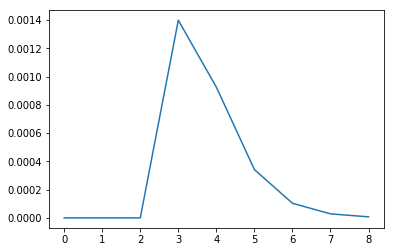

In [107]:
plt.plot(coefs)

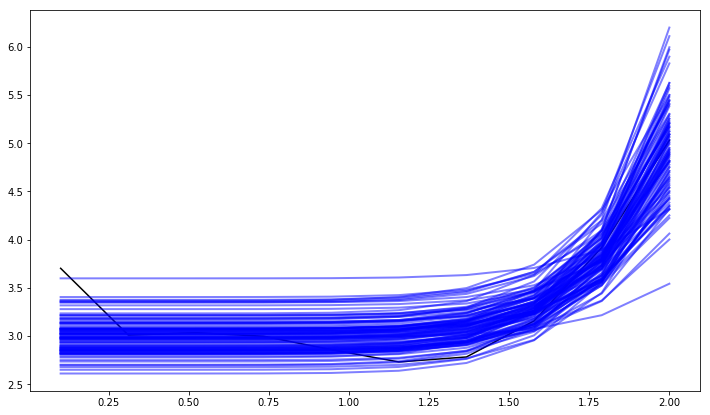

In [110]:
fig,ax = plt.subplots(1,1,figsize=(12,7))
ax.plot(X,y,'k')

deg = 8

for i in range(100):
    y_obs = y+np.random.normal(0,0.5,y.shape)
    pol = PolynomialFeatures(degree=deg)
    Xn = pol.fit_transform(X)
    reg = linear_model.Lasso()
    reg.fit(Xn,y_obs);
    ypred = reg.predict(Xn)
    ax.plot(X,ypred,ls='-',lw=2,alpha=0.5,color='b')

# Linear Regression Multiple Variables

In [114]:
df = pd.read_csv('./datasets/homeprices2.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [115]:
import math
med_bedrooms = math.floor(df.bedrooms.median())

In [116]:
df.bedrooms = df.bedrooms.fillna(med_bedrooms)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [118]:
reg = linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [119]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [120]:
reg.intercept_

221323.00186540408

In [121]:
reg.predict([[3000, 3, 40]])

array([498408.25158031])